<a href="https://colab.research.google.com/github/haduycattuong/DataMining-LayoffsDataset/blob/main/Layoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs Dataset 2023/layoffs_data.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2738 non-null   object 
 1   Location_HQ                 2738 non-null   object 
 2   Industry                    2738 non-null   object 
 3   Percentage                  1819 non-null   float64
 4   Date                        2738 non-null   object 
 5   Source                      2738 non-null   object 
 6   Funds_Raised                2466 non-null   float64
 7   Stage                       2738 non-null   object 
 8   Date_Added                  2738 non-null   object 
 9   Country                     2738 non-null   object 
 10  Laid_Off_Count              1871 non-null   float64
 11  List_of_Employees_Laid_Off  2737 non-null   object 
dtypes: float64(3), object(9)
memory usage: 256.8+ KB


In [99]:
def get_date():
    year_list = []

    col = df['Date_Added']
    for i in range(len(col)):
        date = col[i]
        year = col[i].split("-", 1)[0]
        year_list.append(year)
        # break
    return year_list

layoff_year_list = get_date()

In [100]:
df['Year'] = layoff_year_list

In [101]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off', 'Location_HQ', 'Date'], axis = 1, inplace = True)

In [102]:
df1 = df[(df['Laid_Off_Count'].notna()) & (df['Percentage'].notna())]
df1

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,134.0,Series C,Canada,38.0,2023
7,Grab,Transportation,0.11,16500.0,Post-IPO,Singapore,1000.0,2023
10,Chigari,Media,0.20,88.0,Unknown,India,48.0,2023
13,Mojocare,Healthcare,0.80,24.0,Series A,India,170.0,2023
17,CareRev,Healthcare,0.33,51.0,Series A,United States,100.0,2023
...,...,...,...,...,...,...,...,...
2731,Inspirato,Travel,0.22,79.0,Series C,United States,130.0,2020
2732,Help.com,Support,1.00,6.0,Seed,United States,16.0,2020
2734,HopSkipDrive,Transportation,0.10,45.0,Unknown,United States,8.0,2020
2735,Panda Squad,Consumer,0.75,1.0,Seed,United States,6.0,2020


In [ ]:
df1.groupby('Year')['Laid_Off_Count'].sum().plot(kind='bar',fontsize=12)
plt.title('Number of Layoffs over Years',size=15)
plt.xlabel('Year',size=13)
plt.ylabel('Layoff Count',size=13);

In [ ]:
df1.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)


In [ ]:
df1.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)

In [ ]:
df1.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(kind='bar',fontsize=12)
plt.title('Layoff by Industry',size=15)
plt.xlabel('Industry',size=12)
plt.ylabel('Layoff Count',size=12);

In [ ]:
df1.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).round(3)

In [ ]:
#plot it with bar chart
df1.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).round(3).plot(kind='bar', fontsize=12)
plt.title(' Average Percentage of Layoff by Industry',size=15)
plt.xlabel('Industry',size=12)
plt.ylabel('Layoff Average Percentage',size=12);

In [ ]:
df1.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending=False).round(3)

In [ ]:
df1.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(kind='bar',fontsize=12)
plt.title('Layoff by Stage',size=15)
plt.xlabel('Stage',size=12)
plt.ylabel('Layoff Count',size=12)

In [103]:
df2 = df1.copy()
df2

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,134.0,Series C,Canada,38.0,2023
7,Grab,Transportation,0.11,16500.0,Post-IPO,Singapore,1000.0,2023
10,Chigari,Media,0.20,88.0,Unknown,India,48.0,2023
13,Mojocare,Healthcare,0.80,24.0,Series A,India,170.0,2023
17,CareRev,Healthcare,0.33,51.0,Series A,United States,100.0,2023
...,...,...,...,...,...,...,...,...
2731,Inspirato,Travel,0.22,79.0,Series C,United States,130.0,2020
2732,Help.com,Support,1.00,6.0,Seed,United States,16.0,2020
2734,HopSkipDrive,Transportation,0.10,45.0,Unknown,United States,8.0,2020
2735,Panda Squad,Consumer,0.75,1.0,Seed,United States,6.0,2020


In [104]:
min_funds_raised = df1['Funds_Raised'].min()
max_funds_raised = df1['Funds_Raised'].max()
df2['Funds_Raised'] = ((df1[['Funds_Raised']] - min_funds_raised)) / (max_funds_raised - min_funds_raised).round(3)
df2.head()

,Percentage,Funds_Raised,Laid_Off_Count
count,1367.000000,1243.000000,1367.000000
mean,0.223729,0.006540,278.271397
std,0.209568,0.043104,875.024322
min,0.000000,0.000000,3.000000
25%,0.100000,0.000509,40.000000
50%,0.160000,0.001460,84.000000
75%,0.280000,0.003942,200.000000
max,1.000000,1.000000,12000.000000


In [ ]:
#min_laid_off_count = df1['Laid_Off_Count'].min()
#max_laid_off_count = df1['Laid_Off_Count'].max()
#df2['Laid_Off_Count'] = ((df1[['Laid_Off_Count']] - min_laid_off_count)) / (max_laid_off_count - min_laid_off_count).round(3)
#df2.head()

,Percentage,Funds_Raised,Laid_Off_Count
count,1367.000000,1243.000000,1367.000000
mean,0.223729,0.006540,0.022945
std,0.209568,0.043104,0.072937
min,0.000000,0.000000,0.000000
25%,0.100000,0.000509,0.003084
50%,0.160000,0.001460,0.006752
75%,0.280000,0.003942,0.016421
max,1.000000,1.000000,1.000000


In [105]:
min_percentage = df1['Percentage'].min()
max_percentage = df1['Percentage'].max()
df2['Percentage'] = ((df1[['Percentage']] - min_percentage)) / (max_percentage - min_percentage).round(3)
df2.head()

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,0.001099,Series C,Canada,38.0,2023
7,Grab,Transportation,0.11,0.135357,Post-IPO,Singapore,1000.0,2023
10,Chigari,Media,0.20,0.000722,Unknown,India,48.0,2023
13,Mojocare,Healthcare,0.80,0.000197,Series A,India,170.0,2023
17,CareRev,Healthcare,0.33,0.000418,Series A,United States,100.0,2023


In [106]:
df1['Stage_New'] = ""
df1.loc[df1['Stage'].str.contains("Post-IPO"), 'Stage_New'] = "0"
df1.loc[df1['Stage_New'] == "", 'Stage_New'] = "1"

df2['Stage'] = df1['Stage_New']
df2.head()

<ipython-input-106-44333b385cd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Stage_New'] = ""


,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,0.001099,1,Canada,38.0,2023
7,Grab,Transportation,0.11,0.135357,0,Singapore,1000.0,2023
10,Chigari,Media,0.20,0.000722,1,India,48.0,2023
13,Mojocare,Healthcare,0.80,0.000197,1,India,170.0,2023
17,CareRev,Healthcare,0.33,0.000418,1,United States,100.0,2023


In [107]:
df1['Country_New'] = ""
df1.loc[df1['Country'].str.contains("United States"), 'Country_New'] = "0"
df1.loc[df1['Country_New'] == "", 'Country_New'] = "1"

df2['Country'] = df1['Country_New']
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned.csv')
df2.head()

<ipython-input-107-f3ad808aadec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Country_New'] = ""


,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,0.001099,1,1,38.0,2023
7,Grab,Transportation,0.11,0.135357,0,1,1000.0,2023
10,Chigari,Media,0.20,0.000722,1,1,48.0,2023
13,Mojocare,Healthcare,0.80,0.000197,1,1,170.0,2023
17,CareRev,Healthcare,0.33,0.000418,1,0,100.0,2023


In [108]:
frequency_table_industry = df1['Industry'].value_counts().sort_index().reset_index()
frequency_table_industry.columns = ['Industry', 'Industry_freq']

min_frequency_table_industry = frequency_table_industry['Industry_freq'].min()
max_frequency_table_industry = frequency_table_industry['Industry_freq'].max()

frequency_table_industry['Industry_freq'] = frequency_table_industry['Industry_freq'].apply(lambda x: (x - min_frequency_table_industry) / (max_frequency_table_industry - min_frequency_table_industry)).round(4)

frequency_table_industry

,Industry,Industry_freq
0,Aerospace,0.0054
1,Construction,0.0380
2,Consumer,0.3315
3,Crypto,0.3098
4,Data,0.2174
5,Education,0.2500
6,Energy,0.0109
7,Finance,1.0000
8,Fitness,0.0870
9,Food,0.3967


In [109]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned.csv')


df3 = df3.merge(frequency_table_industry[['Industry', 'Industry_freq']], on = 'Industry')

In [ ]:
#df1['Year_New'] = ""
#df1.loc[df1['Year'].str.contains("2020"), 'Year_New'] = "0"
#df1.loc[df1['Year'].str.contains("2021"), 'Year_New'] = "0.33"
#df1.loc[df1['Year'].str.contains("2022"), 'Year_New'] = "0.67"
#df1.loc[df1['Year_New'] == "", 'Year_New'] = "1"

#df2['Year'] = df1['Year_New']
#df2.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned_Year.csv')
#df2.head()

<ipython-input-33-6fcccb3133fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year_New'] = ""


,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,0.001099,1,1,38.0,1
7,Grab,Transportation,0.11,0.135357,0,1,1000.0,1
10,Chigari,Media,0.20,0.000722,1,1,48.0,1
13,Mojocare,Healthcare,0.80,0.000197,1,1,170.0,1
17,CareRev,Healthcare,0.33,0.000418,1,0,100.0,1


#KNN Classification Report, Naive Bayes


In [110]:
df3['Industry'] = df3['Industry_freq']

df3 = df3.drop(labels = ['Unnamed: 0', 'Industry_freq'], axis = 1)
df3.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned_Final.csv')


In [111]:
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned_Final.csv', index_col = 0)
df4


,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
0,Ritual,0.3967,0.40,0.001099,1,1,38.0,2023
1,Olo,0.3967,0.11,0.001509,0,0,81.0,2023
2,Grubhub,0.3967,0.15,0.002330,1,0,400.0,2023
3,Flink,0.3967,0.16,0.008203,1,1,100.0,2023
4,Cornershop,0.3967,0.11,0.000254,1,1,250.0,2023
...,...,...,...,...,...,...,...,...
1362,Rhumbix,0.0380,0.27,0.000287,1,0,16.0,2020
1363,Katerra,0.0380,0.03,0.009844,1,0,240.0,2020
1364,Kitty Hawk,0.0054,1.00,0.000008,1,0,100.0,2022
1365,Astra,0.0054,0.25,0.000820,1,0,40.0,2020


In [112]:
data = df4.dropna()
data

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
0,Ritual,0.3967,0.40,0.001099,1,1,38.0,2023
1,Olo,0.3967,0.11,0.001509,0,0,81.0,2023
2,Grubhub,0.3967,0.15,0.002330,1,0,400.0,2023
3,Flink,0.3967,0.16,0.008203,1,1,100.0,2023
4,Cornershop,0.3967,0.11,0.000254,1,1,250.0,2023
...,...,...,...,...,...,...,...,...
1362,Rhumbix,0.0380,0.27,0.000287,1,0,16.0,2020
1363,Katerra,0.0380,0.03,0.009844,1,0,240.0,2020
1364,Kitty Hawk,0.0054,1.00,0.000008,1,0,100.0,2022
1365,Astra,0.0054,0.25,0.000820,1,0,40.0,2020


In [113]:
data['Laid_Off_Rank'] = ""
data.loc[(data['Laid_Off_Count'] >= 250) & (data['Laid_Off_Count'] < 400), 'Laid_Off_Rank'] = "Medium"
data.loc[(data['Laid_Off_Count'] >= 400), 'Laid_Off_Rank'] = "High"
data.loc[(data['Laid_Off_Count'] < 250) , 'Laid_Off_Rank'] = "Low"
data

<ipython-input-113-3b289261afa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Laid_Off_Rank'] = ""


,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,0.3967,0.40,0.001099,1,1,38.0,2023,Low
1,Olo,0.3967,0.11,0.001509,0,0,81.0,2023,Low
2,Grubhub,0.3967,0.15,0.002330,1,0,400.0,2023,High
3,Flink,0.3967,0.16,0.008203,1,1,100.0,2023,Low
4,Cornershop,0.3967,0.11,0.000254,1,1,250.0,2023,Medium
...,...,...,...,...,...,...,...,...,...
1362,Rhumbix,0.0380,0.27,0.000287,1,0,16.0,2020,Low
1363,Katerra,0.0380,0.03,0.009844,1,0,240.0,2020,Low
1364,Kitty Hawk,0.0054,1.00,0.000008,1,0,100.0,2022,Low
1365,Astra,0.0054,0.25,0.000820,1,0,40.0,2020,Low


In [114]:
train_df, test_df = train_test_split(data, test_size = 0.1, random_state = 42)

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(train_df[['Industry', 'Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']], train_df['Laid_Off_Rank'])

knn_predictions = knn_model.predict(test_df[['Industry', 'Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']])

print("KNN Classification Report: ")
print(classification_report(test_df['Laid_Off_Rank'], knn_predictions))

KNN Classification Report: 
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        14
         Low       1.00      1.00      1.00       101
      Medium       1.00      1.00      1.00        10

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [115]:
nb_model = GaussianNB()
nb_model.fit(train_df[['Industry', 'Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']], train_df['Laid_Off_Rank'])

nb_predictions = nb_model.predict(test_df[['Industry', 'Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']])
print("Naive_Bayes Classification Report: ")
print(classification_report(test_df['Laid_Off_Rank'], nb_predictions))

Naive_Bayes Classification Report: 
              precision    recall  f1-score   support

        High       0.92      0.86      0.89        14
         Low       1.00      0.99      1.00       101
      Medium       0.75      0.90      0.82        10

    accuracy                           0.97       125
   macro avg       0.89      0.92      0.90       125
weighted avg       0.97      0.97      0.97       125



In [116]:
data_kmeans = data.dropna()
data_kmeans

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,0.3967,0.40,0.001099,1,1,38.0,2023,Low
1,Olo,0.3967,0.11,0.001509,0,0,81.0,2023,Low
2,Grubhub,0.3967,0.15,0.002330,1,0,400.0,2023,High
3,Flink,0.3967,0.16,0.008203,1,1,100.0,2023,Low
4,Cornershop,0.3967,0.11,0.000254,1,1,250.0,2023,Medium
...,...,...,...,...,...,...,...,...,...
1362,Rhumbix,0.0380,0.27,0.000287,1,0,16.0,2020,Low
1363,Katerra,0.0380,0.03,0.009844,1,0,240.0,2020,Low
1364,Kitty Hawk,0.0054,1.00,0.000008,1,0,100.0,2022,Low
1365,Astra,0.0054,0.25,0.000820,1,0,40.0,2020,Low


#KMeans


In [118]:
data['Rank_New'] = ""
data.loc[data['Laid_Off_Rank'].str.contains("Low"), 'Rank_New'] = "0"
data.loc[data['Laid_Off_Rank'].str.contains("Medium"), 'Rank_New'] = "0.5"
data.loc[data['Laid_Off_Rank'].str.contains("High"), 'Rank_New'] = "1"
data_kmeans['Laid_Off_Rank'] = data['Rank_New']
data_kmeans.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Final_Kmeans.csv')
data_kmeans.head()

<ipython-input-118-dc9b1791ceb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rank_New'] = ""


,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,0.3967,0.40,0.001099,1,1,38.0,2023,0
1,Olo,0.3967,0.11,0.001509,0,0,81.0,2023,0
2,Grubhub,0.3967,0.15,0.002330,1,0,400.0,2023,1
3,Flink,0.3967,0.16,0.008203,1,1,100.0,2023,0
4,Cornershop,0.3967,0.11,0.000254,1,1,250.0,2023,0.5


In [125]:
#tach thanh 2 tap tin train va test
data_train = data_kmeans.iloc[:-50]
data_test = data_kmeans.iloc[-50:]
data_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Kmeans_Train',index=False)
data_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Kmeans_Test',index=False)


In [126]:
from sklearn.cluster import KMeans
#loai bo cot pep tu ca 2 tap du lieu
X_train = data_train.drop('Company', axis = 1)
#thuc hien gom cum Kmean cho tap train voi k=2 k=3 k=4
kmeans2 = KMeans(n_clusters=2,random_state=0).fit(X_train)
kmeans3 = KMeans(n_clusters=3,random_state=0).fit(X_train)
kmeans4 = KMeans(n_clusters=4,random_state=0).fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


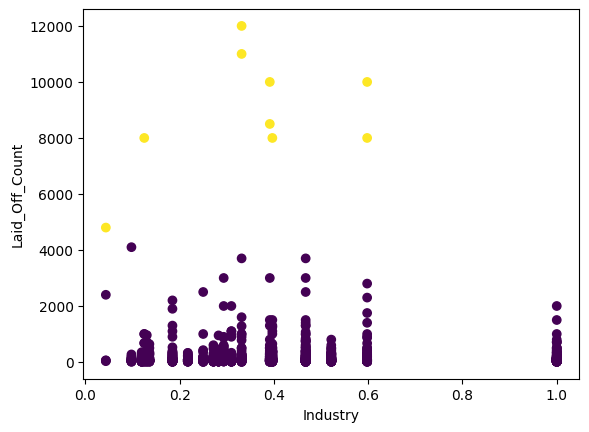

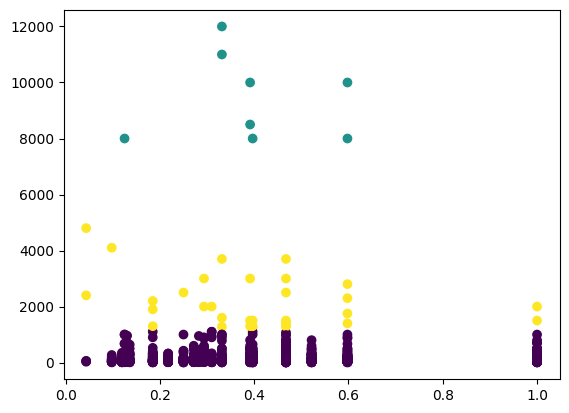

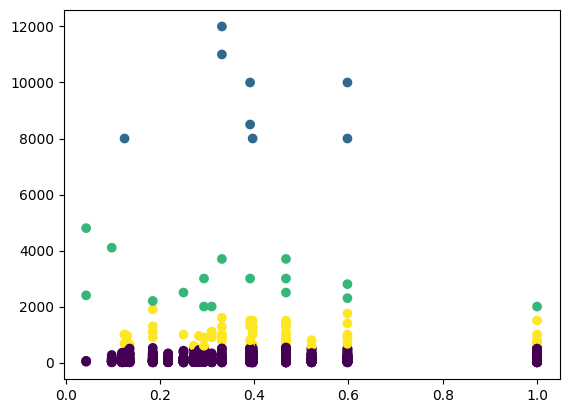

In [128]:
#fit model Kmeans voi du lieu da duoc chuan hoa:
X_train = data_train.drop('Company', axis = 1)
y_pred_2 = kmeans2.predict(X_train)
y_pred_3 = kmeans3.predict(X_train)
y_pred_4 = kmeans4.predict(X_train)

import matplotlib.pyplot as plt
plt.xlabel('Industry')
plt.ylabel('Laid_Off_Count')
plt.scatter(X_train['Industry'],X_train['Laid_Off_Count'],c=y_pred_2)
plt.show()
plt.scatter(X_train['Industry'],X_train['Laid_Off_Count'],c=y_pred_3)
plt.show()
plt.scatter(X_train['Industry'],X_train['Laid_Off_Count'],c=y_pred_4)
plt.show()

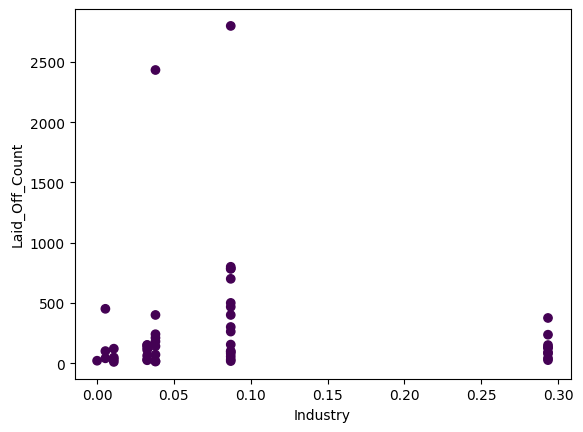

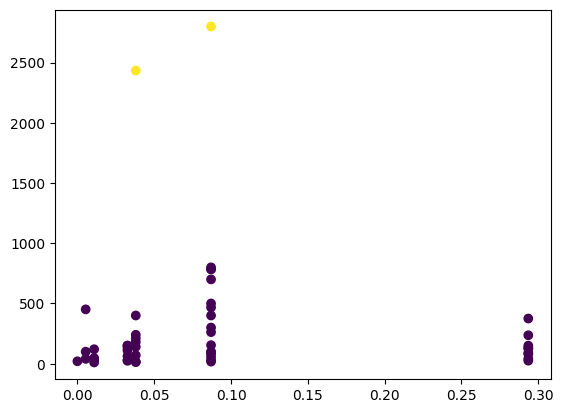

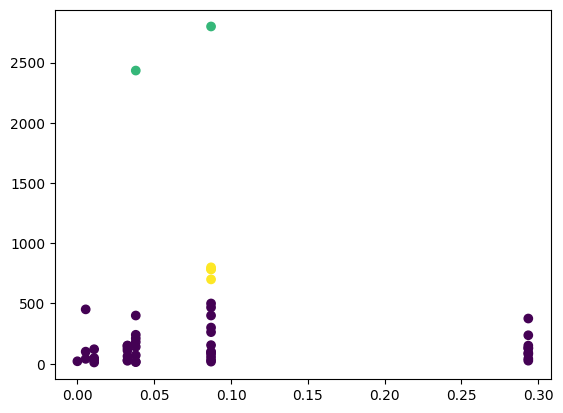

In [129]:
X_test = data_test.drop('Company', axis = 1)
y_pred_2 = kmeans2.predict(X_test)
y_pred_3 = kmeans3.predict(X_test)
y_pred_4 = kmeans4.predict(X_test)

import matplotlib.pyplot as plt
plt.xlabel('Industry')
plt.ylabel('Laid_Off_Count')
plt.scatter(X_test['Industry'],X_test['Laid_Off_Count'],c=y_pred_2)
plt.show()
plt.scatter(X_test['Industry'],X_test['Laid_Off_Count'],c=y_pred_3)
plt.show()
plt.scatter(X_test['Industry'],X_test['Laid_Off_Count'],c=y_pred_4)
plt.show()